<a href="https://colab.research.google.com/github/Siddharth-Singh-2004/CU-BEMS_Floor1_2018/blob/main/CU_BEMS_Floor1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import pandas as pd
import numpy as np
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
import math

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
old_df=pd.read_csv('/content/drive/MyDrive/2018Floor1.csv')

In [4]:
old_df.head()

,Date,z1_Light(kW),z1_Plug(kW),z2_AC1(kW),z2_AC2(kW),z2_AC3(kW),z2_AC4(kW),z2_Light(kW),z2_Plug(kW),z3_Light(kW),z3_Plug(kW),z4_Light(kW)
0,2018-07-01 00:00:00,12.94,18.56,45.24,0.01,0.01,0.00,13.76,17.64,10.92,0.89,35.76
1,2018-07-01 00:01:00,12.97,18.55,45.28,0.02,0.01,0.01,13.76,17.21,10.95,0.87,35.81
2,2018-07-01 00:02:00,12.97,18.55,45.24,0.01,0.01,0.01,13.79,17.18,10.94,0.86,35.78
3,2018-07-01 00:03:00,12.98,18.58,45.26,0.02,0.01,0.00,13.81,16.64,10.94,0.85,35.83
4,2018-07-01 00:04:00,13.01,18.60,45.22,0.02,0.01,0.01,13.83,15.69,10.97,0.85,35.86


In [5]:
old_df.tail()

,Date,z1_Light(kW),z1_Plug(kW),z2_AC1(kW),z2_AC2(kW),z2_AC3(kW),z2_AC4(kW),z2_Light(kW),z2_Plug(kW),z3_Light(kW),z3_Plug(kW),z4_Light(kW)
264955,2018-12-31 23:55:00,0.01,0.57,49.30,1.37,0.01,0.01,18.03,14.09,10.21,0.37,14.58
264956,2018-12-31 23:56:00,0.01,0.57,45.44,1.36,0.01,0.00,17.72,11.37,10.13,0.38,14.60
264957,2018-12-31 23:57:00,0.01,0.58,2.31,1.36,0.01,0.01,17.48,11.35,10.07,0.38,14.57
264958,2018-12-31 23:58:00,0.02,0.57,2.31,1.35,0.00,0.00,17.43,11.39,9.99,0.37,14.59
264959,2018-12-31 23:59:00,0.00,0.56,2.31,1.36,0.01,0.01,17.42,11.38,10.05,0.38,14.59


In [6]:
old_df['Date'] = pd.to_datetime(old_df['Date'])

In [7]:
old_df_filled = old_df.fillna(0)

In [8]:
grouped_df = old_df_filled.groupby('Date').sum()
grouped_df['total_power'] = grouped_df.sum(axis=1)

In [9]:
grouped_df.head()

,z1_Light(kW),z1_Plug(kW),z2_AC1(kW),z2_AC2(kW),z2_AC3(kW),z2_AC4(kW),z2_Light(kW),z2_Plug(kW),z3_Light(kW),z3_Plug(kW),z4_Light(kW),total_power
Date,,,,,,,,,,,,
2018-07-01 00:00:00,12.94,18.56,45.24,0.01,0.01,0.00,13.76,17.64,10.92,0.89,35.76,155.73
2018-07-01 00:01:00,12.97,18.55,45.28,0.02,0.01,0.01,13.76,17.21,10.95,0.87,35.81,155.44
2018-07-01 00:02:00,12.97,18.55,45.24,0.01,0.01,0.01,13.79,17.18,10.94,0.86,35.78,155.34
2018-07-01 00:03:00,12.98,18.58,45.26,0.02,0.01,0.00,13.81,16.64,10.94,0.85,35.83,154.92
2018-07-01 00:04:00,13.01,18.60,45.22,0.02,0.01,0.01,13.83,15.69,10.97,0.85,35.86,154.07


In [10]:
df = grouped_df[['total_power']].reset_index()

In [11]:
df.head()

,Date,total_power
0,2018-07-01 00:00:00,155.73
1,2018-07-01 00:01:00,155.44
2,2018-07-01 00:02:00,155.34
3,2018-07-01 00:03:00,154.92
4,2018-07-01 00:04:00,154.07


In [12]:
df.tail()

,Date,total_power
264955,2018-12-31 23:55:00,108.55
264956,2018-12-31 23:56:00,101.59
264957,2018-12-31 23:57:00,58.13
264958,2018-12-31 23:58:00,58.02
264959,2018-12-31 23:59:00,58.07


In [13]:
df['total_power'] = df['total_power'].astype(float)

In [14]:
# Normalizing
data_max = df['total_power'].max()
data_min = df['total_power'].min()
df['total_power'] = (df['total_power'] - data_min) / (data_max - data_min)

In [15]:
df.head()

,Date,total_power
0,2018-07-01 00:00:00,0.032482
1,2018-07-01 00:01:00,0.032422
2,2018-07-01 00:02:00,0.032401
3,2018-07-01 00:03:00,0.032313
4,2018-07-01 00:04:00,0.032136


In [16]:
# Custom Dataset
class TimeSeriesDataset(Dataset):

  def __init__(self, data, sequence_length):
    self.data = data
    self.sequence_length = sequence_length

  def __len__(self):
    return len(self.data) - self.sequence_length

  def __getitem__(self, idx):
    x = self.data[idx:idx+self.sequence_length]
    y = self.data[idx+self.sequence_length]
    return torch.tensor(x, dtype=torch.float32), torch.tensor(y, dtype=torch.float32)



In [17]:
# Standard values
number_of_minutes_in_an_hour = 60
number_of_minutes_in_a_day = 24 * number_of_minutes_in_an_hour

In [18]:
window_size = 2
train_size = window_size * number_of_minutes_in_a_day
test_size = number_of_minutes_in_a_day

In [19]:
dataslice = df['total_power'][-train_size - test_size:]
dataset = TimeSeriesDataset(dataslice.values, sequence_length = number_of_minutes_in_an_hour)
dataloader = DataLoader(dataset, batch_size=10, shuffle=True)

In [20]:
for batch_idx, (x, y) in enumerate(dataloader):
  print(f"Batch {batch_idx+1}:")
  print(f"x: {x}")
  print(f"y: {y}")

Streaming output truncated to the last 5000 lines.
         0.0298, 0.0305, 0.0208, 0.0208, 0.0208, 0.0208, 0.0218, 0.0219, 0.0224,
         0.0269, 0.0321, 0.0249, 0.0222, 0.0209, 0.0191, 0.0188, 0.0188, 0.0188,
         0.0188, 0.0199, 0.0287, 0.0298, 0.0205, 0.0205, 0.0204, 0.0203, 0.0191,
         0.0188, 0.0188, 0.0250, 0.0280, 0.0209, 0.0202, 0.0204, 0.0204, 0.0204,
         0.0204, 0.0200, 0.0207, 0.0292, 0.0258, 0.0188, 0.0189, 0.0188, 0.0196,
         0.0204, 0.0204, 0.0204, 0.0266, 0.0298, 0.0215],
        [0.0274, 0.0318, 0.0294, 0.0244, 0.0322, 0.0244, 0.0284, 0.0284, 0.0297,
         0.0299, 0.0299, 0.0338, 0.0258, 0.0337, 0.0256, 0.0285, 0.0282, 0.0322,
         0.0283, 0.0243, 0.0335, 0.0258, 0.0298, 0.0299, 0.0298, 0.0298, 0.0297,
         0.0285, 0.0282, 0.0288, 0.0309, 0.0309, 0.0300, 0.0297, 0.0297, 0.0297,
         0.0296, 0.0296, 0.0294, 0.0285, 0.0282, 0.0283, 0.0282, 0.0283, 0.0294,
         0.0299, 0.0299, 0.0299, 0.0298, 0.0297, 0.0296, 0.0288, 0.0282, 0.0282,


In [21]:
# Transformer model
class TimeSeriesTransformer(nn.Module):

  def __init__(self, input_size, d_model, n_heads, num_layers):
    super(TimeSeriesTransformer, self).__init__()
    self.embedding = nn.Linear(input_size, d_model)
    self.positional_embedding = nn.Parameter(torch.zeros(70, d_model))
    self.transformer = nn.Transformer(d_model, n_heads, num_layers)
    self.fc_out = nn.Linear(d_model, 1)

  def forward(self, src):
    src = src.unsqueeze(-1)
    src = self.embedding(src)
    src = src + self.positional_embedding[:src.size(1), :]
    src = src.permute(1, 0, 2)
    transformer_output = self.transformer(src, src)
    transformer_output = transformer_output.permute(1, 0, 2)
    output = self.fc_out(transformer_output)
    return output[:, -1, :]



In [22]:
def compute_r2(y_true, y_pred):
    y_true = y_true.detach().numpy()
    y_pred = y_pred.detach().numpy()
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    r2_score = 1 - (ss_res / ss_tot)
    return r2_score

In [23]:
input_size = 1
d_model = 32
n_heads = 4
num_layers = 2
sequence_length = number_of_minutes_in_an_hour
model = TimeSeriesTransformer(input_size, d_model, n_heads, num_layers)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/transformer.py:306: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


In [ ]:
# Training loop
epochs = 40
for epoch in range(epochs):
  epoch_loss = 0.0
  epoch_r2 = 0.0
  for x, y in dataloader:
    optimizer.zero_grad()
    y = y.unsqueeze(-1)
    output = model(x)
    loss = criterion(output, y)
    loss.backward()
    optimizer.step()
    epoch_loss += loss.item()

    r2 = compute_r2(y, output)
    epoch_r2 += r2

  epoch_loss /= len(dataloader)
  epoch_r2 /= len(dataloader)

  print(f'Epoch {epoch+1}, Loss: {epoch_loss:.4f}, R²: {epoch_r2:.4f}')

Epoch 1, Loss: 0.0001, R²: -0.3364
Epoch 2, Loss: 0.0001, R²: -0.3538
Epoch 3, Loss: 0.0001, R²: -0.2609
Epoch 4, Loss: 0.0001, R²: -0.3016
Epoch 5, Loss: 0.0001, R²: -0.3420
Epoch 6, Loss: 0.0001, R²: -0.3414
Epoch 7, Loss: 0.0001, R²: -0.3729
Epoch 8, Loss: 0.0001, R²: -0.2968
Epoch 9, Loss: 0.0001, R²: -0.4690
Epoch 10, Loss: 0.0001, R²: -0.2636
Epoch 11, Loss: 0.0001, R²: -0.2544
Epoch 12, Loss: 0.0001, R²: -0.3200
Epoch 13, Loss: 0.0001, R²: -0.1967
Epoch 14, Loss: 0.0001, R²: -0.3059
Epoch 15, Loss: 0.0001, R²: -0.2328
Epoch 16, Loss: 0.0001, R²: -0.1974
Epoch 17, Loss: 0.0001, R²: -0.2906
Epoch 18, Loss: 0.0001, R²: -0.2486
Epoch 19, Loss: 0.0001, R²: -0.2519


In [25]:
model.eval()
with torch.no_grad():
  last_sequence = torch.tensor(dataslice[-sequence_length:].values, dtype=torch.float32).unsqueeze(0)
  forecast_length = test_size
  forecasts = []

  for _ in range(forecast_length):
    normalized_forecast = model(last_sequence)
    forecast = normalized_forecast.item() * (data_max - data_min) + data_min
    forecasts.append(forecast)

    new_forecast = torch.tensor([normalized_forecast.item()], dtype=torch.float32).unsqueeze(0)
    last_sequence = torch.cat((last_sequence[:, 1:], new_forecast), dim=1)

  print(f'List of forecasts: {forecasts}')

List of forecasts: [87.96587127663194, 87.96587127663194, 87.96588913690299, 87.96587127663194, 87.96585341636091, 87.96587127663194, 87.96585341636091, 87.96590699717402, 87.96587127663194, 87.96588913690299, 87.96588913690299, 87.96590699717402, 87.96587127663194, 87.96590699717402, 87.96585341636091, 87.96590699717402, 87.96590699717402, 87.96587127663194, 87.96588913690299, 87.96587127663194, 87.96587127663194, 87.96587127663194, 87.96588913690299, 87.96587127663194, 87.96585341636091, 87.96585341636091, 87.96583555608987, 87.96585341636091, 87.96588913690299, 87.96587127663194, 87.96585341636091, 87.96590699717402, 87.96583555608987, 87.96583555608987, 87.96587127663194, 87.96587127663194, 87.96587127663194, 87.96583555608987, 87.96590699717402, 87.96588913690299, 87.96583555608987, 87.96588913690299, 87.96587127663194, 87.96583555608987, 87.96590699717402, 87.96590699717402, 87.96590699717402, 87.96592485744506, 87.96590699717402, 87.96590699717402, 87.96588913690299, 87.96588913

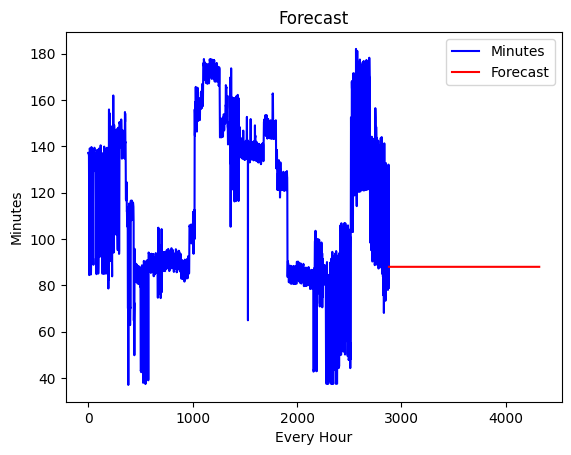

In [26]:
new_data = dataslice.values * (data_max - data_min) + data_min
all_data = np.concatenate([new_data[:train_size], forecasts])
x = np.arange(1, len(all_data) + 1)

split_point = len(all_data) - len(forecasts)

plt.plot(x[:split_point], all_data[:split_point], label='Minutes', color='blue')

plt.plot(x[split_point:], all_data[split_point:], label='Forecast', color='red')

plt.xlabel('Every Hour')
plt.ylabel('Minutes')
plt.title('Forecast')

plt.legend()

plt.show()

In [ ]:
new_data = dataslice.values * (data_max - data_min) + data_min
mse = np.mean((new_data - forecasts) ** 2)
print(f'Mean Squared Error (MSE): {mse}')